In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df  = pd.read_csv('LoanData.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df['Loan_ID'].nunique()

614

In [6]:
df.drop(columns=['Loan_ID'],inplace=True)

In [7]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [9]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [11]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [15]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [17]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [18]:
df['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [19]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [20]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [21]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [22]:
df['Credit_History'] = df['Credit_History'].replace({1:'good',0:'bad'})
df['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [23]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [24]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [25]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [26]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [27]:
continuous = ['Income','LoanAmount']

discrete_categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

In [28]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History       object
Property_Area        object
Loan_Status          object
Income              float64
dtype: object

In [29]:
df[continuous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


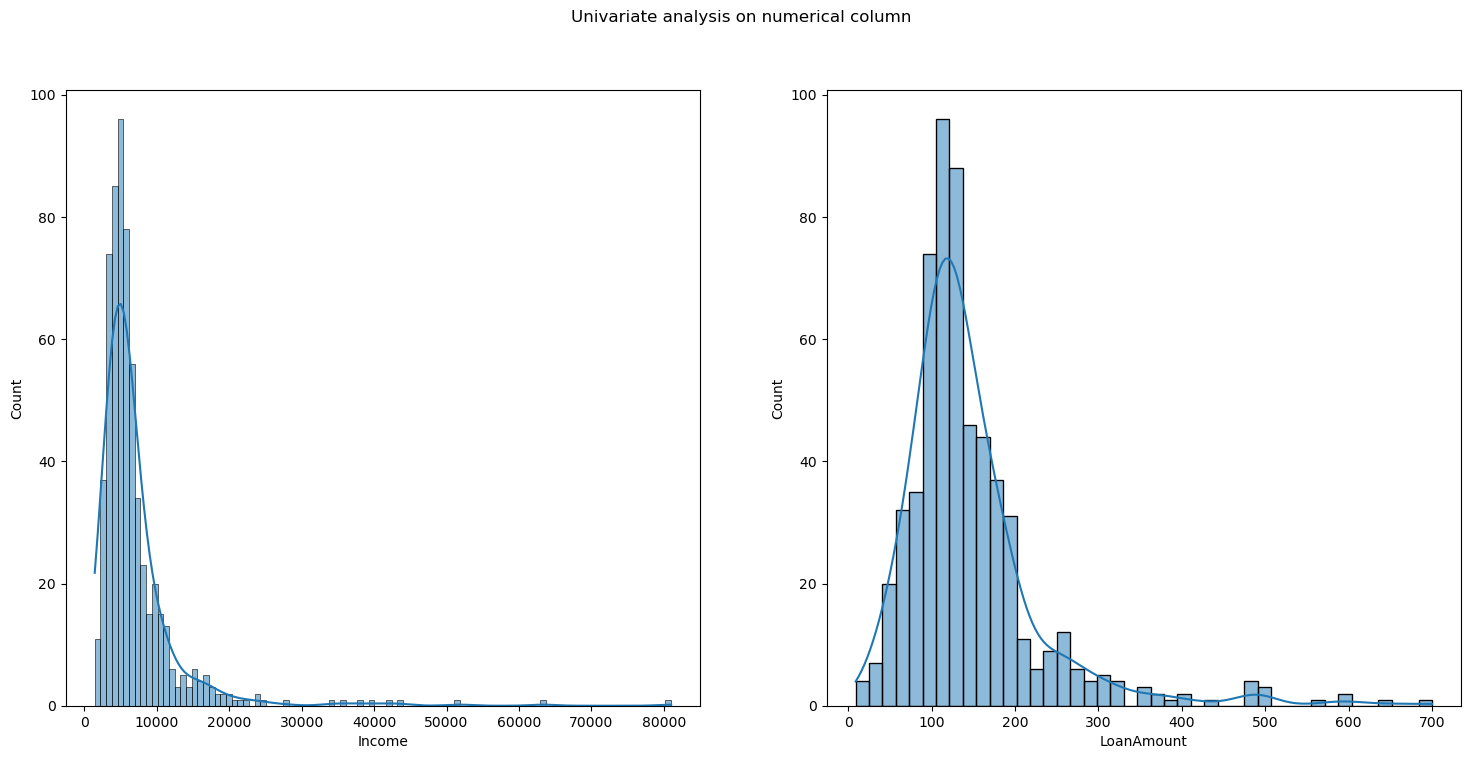

In [30]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(df['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'],kde=True)

plt.suptitle('Univariate analysis on numerical column')
plt.show()

In [31]:
df[continuous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

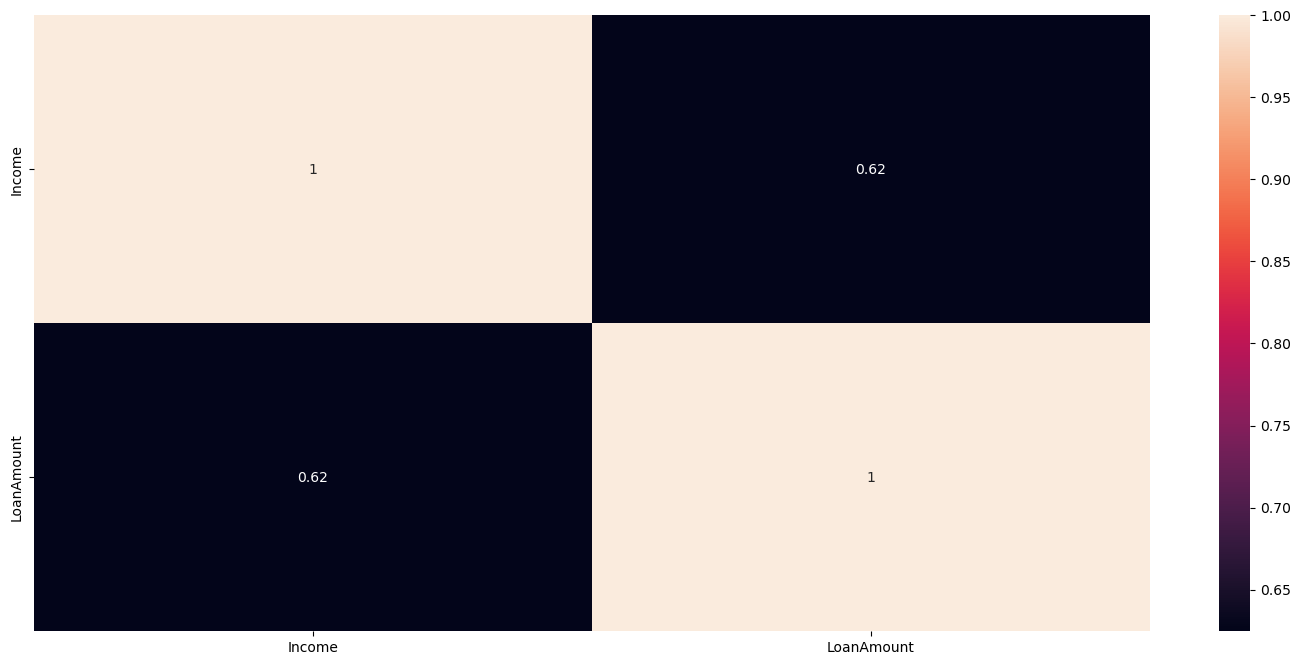

In [32]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

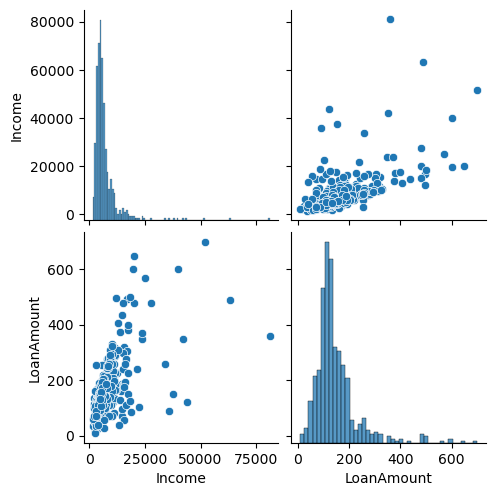

In [33]:
sns.pairplot(df[continuous])
plt.show()

In [34]:
df[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


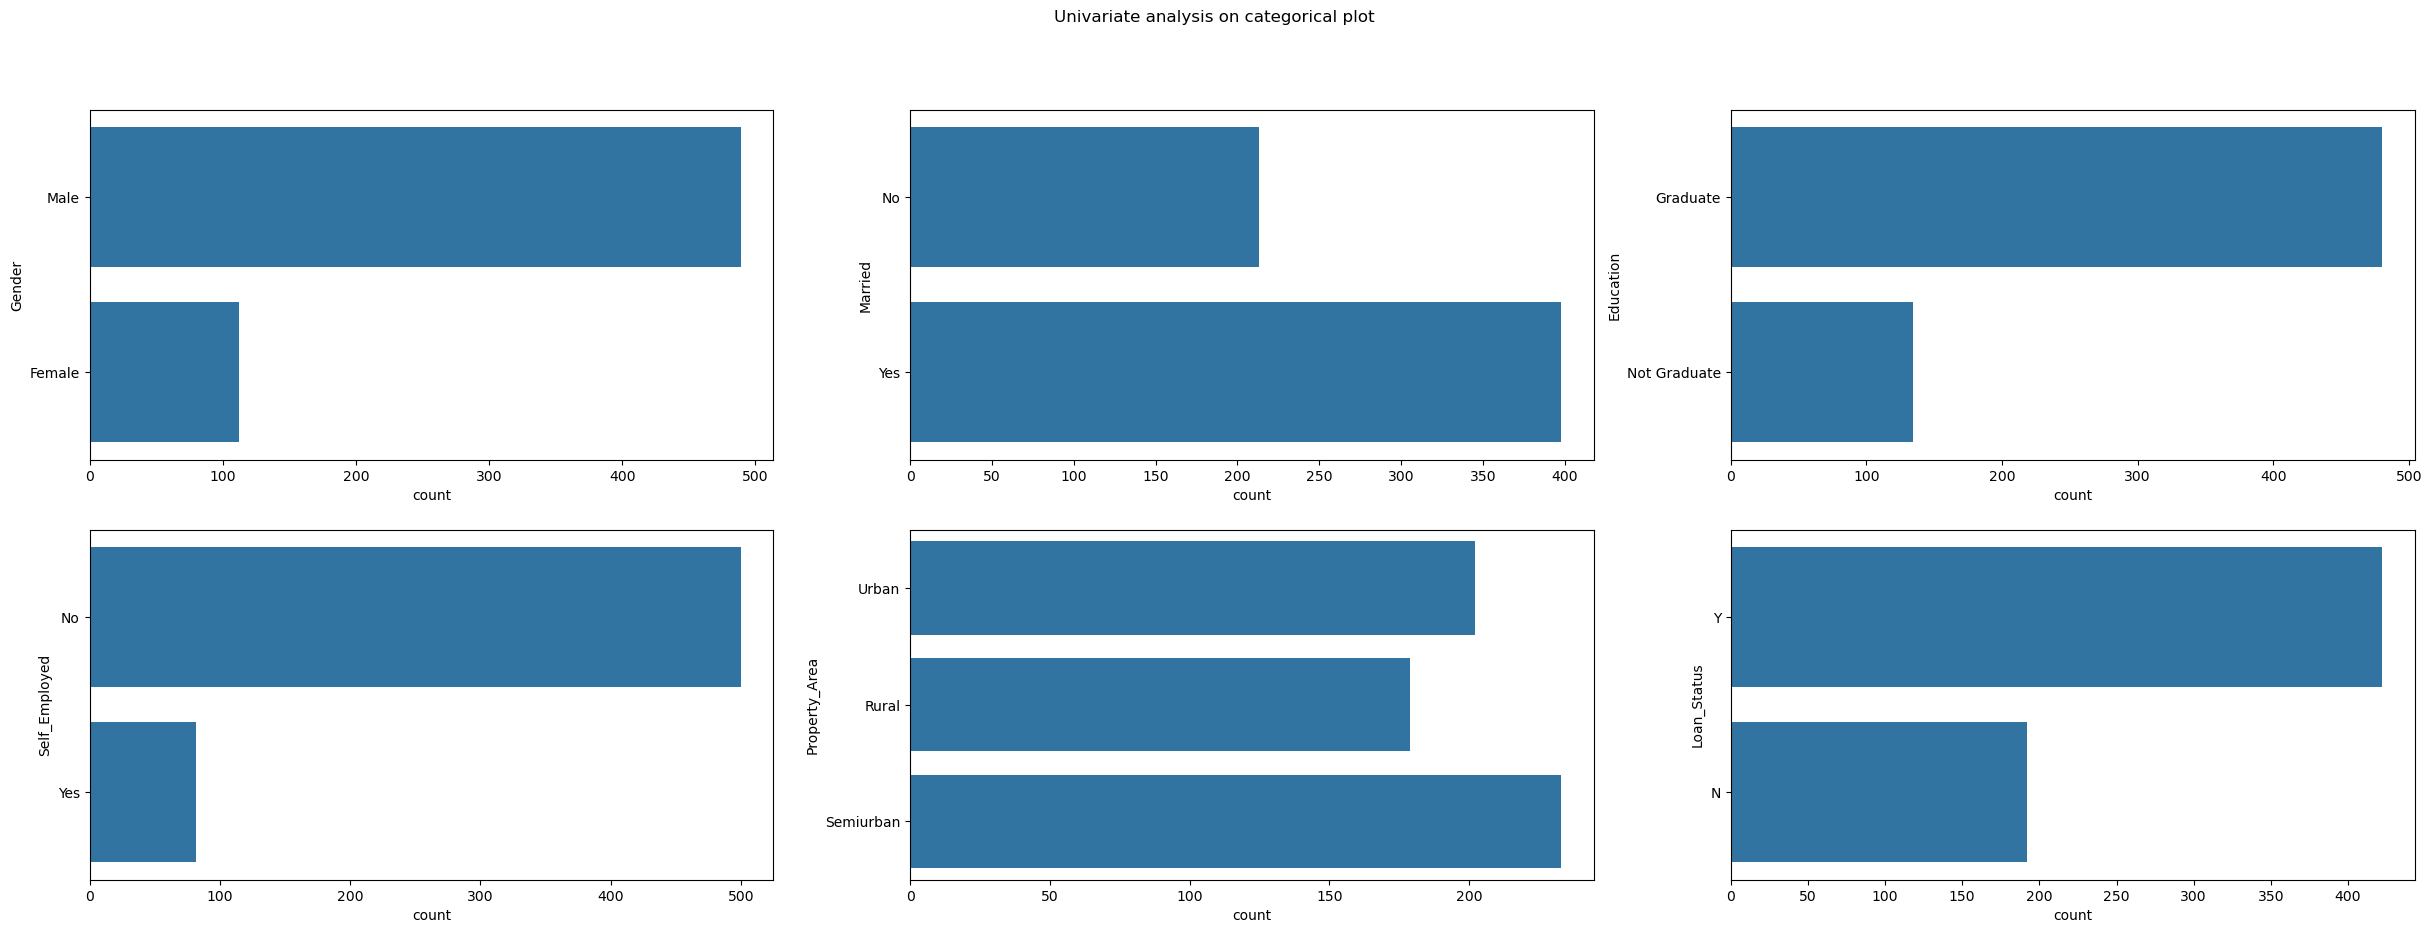

In [35]:
plt.rcParams['figure.figsize'] = (30,10)

plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,2)
sns.countplot(df['Married'])

plt.subplot(2,3,3)
sns.countplot(df['Education'])

plt.subplot(2,3,4)
sns.countplot(df['Self_Employed'])

plt.subplot(2,3,5)
sns.countplot(df['Property_Area'])

plt.subplot(2,3,6)
sns.countplot(df['Loan_Status'])

plt.suptitle('Univariate analysis on categorical plot')

plt.show()

In [36]:
# Comparing all categories with loan status

print("Impact of Marraige on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Education' ]))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Self_Employed' ]))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Property_Area']))
print("\n")

print("Impact of Property on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Credit_History' ]))

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


Impact of Property on Loan Status
Credit_History  bad  good
Loan_Status              
N                82    97
Y                 7   378


In [37]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [38]:
df[continuous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

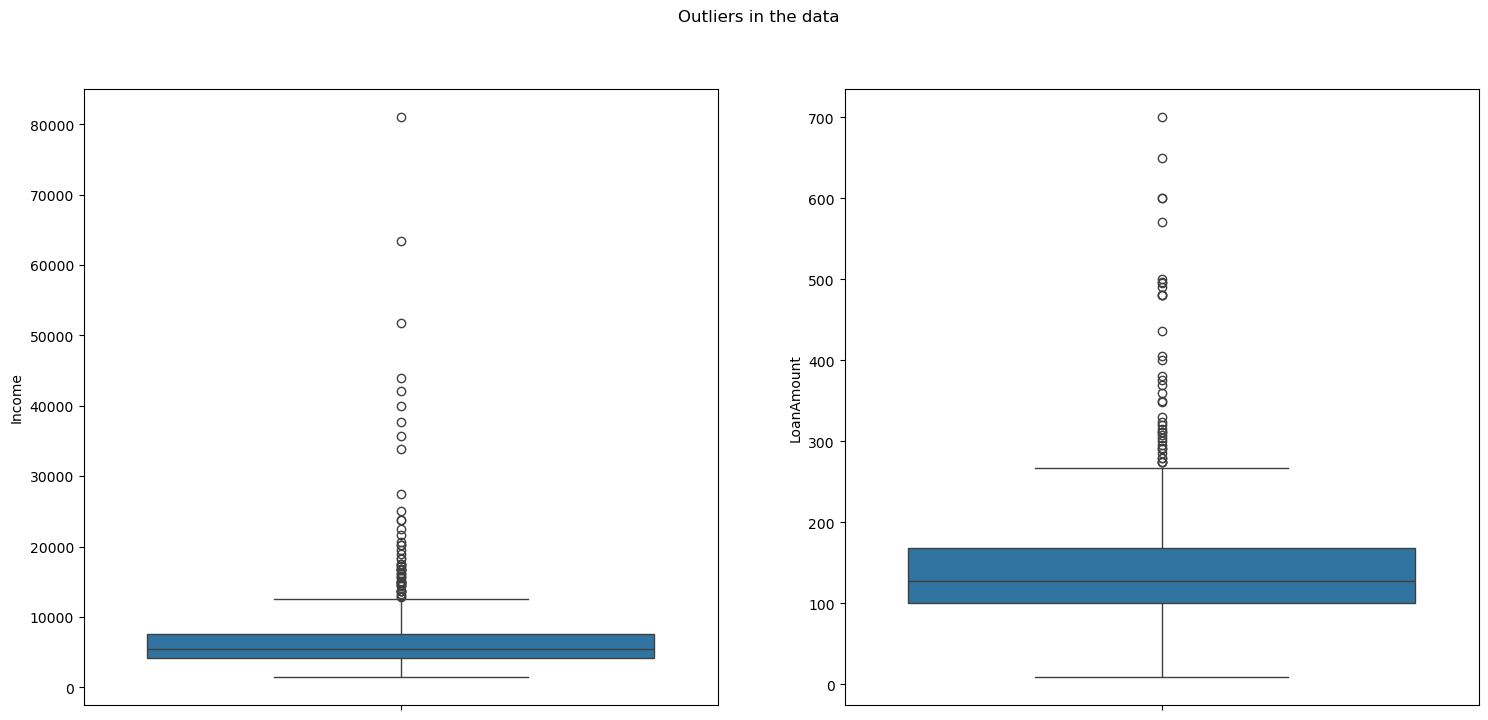

In [39]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.boxplot(df['Income'])

plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outliers in the data')

plt.show()

In [40]:
df['Dependents'] = df['Dependents'].replace({'3+':3})

In [41]:
df['Dependents'] = df['Dependents'].fillna(0)

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df = df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

In [42]:
df['Dependents'] = df['Dependents'].astype(dtype='int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(dtype='int')

In [43]:
df['Gender'] = df['Gender' ].replace({'Male':1,'Female':0})
df['Married' ] = df['Married' ].replace({'Yes':1,'No':0})
df['Education' ] = df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed' ] = df['Self_Employed'].replace({'Yes':1,'No':0})
df['Property_Area' ] = df['Property_Area' ].replace({'Rural':0,'Semiurban':1,'Urban' :2})
df['Credit_History' ] = df['Credit_History' ].replace({'good':1,'bad':0})
df['Loan_Status' ] = df['Loan_Status'].replace({'Y':1,'N':0})

In [44]:
from scipy.stats import boxcox
df['Income'],a = boxcox(df['Income'])
df['LoanAmount'],c = boxcox(df['LoanAmount'])

In [45]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

In [46]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=7)

In [48]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=0.95)

X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_pca,y_train)

ypred_train = log_model.predict(X_train_pca)
print('Train accuracy :',accuracy_score(y_train,ypred_train))

ypred_test = log_model.predict(X_test_pca)
print('Test accuracy :',accuracy_score(y_test,ypred_test))

print('CV :',cross_val_score(log_model,X_train_pca,y_train,cv=5,scoring='accuracy').mean())

Train accuracy : 0.6855791962174941
Test accuracy : 0.7169811320754716
CV : 0.6856022408963586


In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[ 0 30]
 [ 0 76]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.72      1.00      0.84        76

    accuracy                           0.72       106
   macro avg       0.36      0.50      0.42       106
weighted avg       0.51      0.72      0.60       106



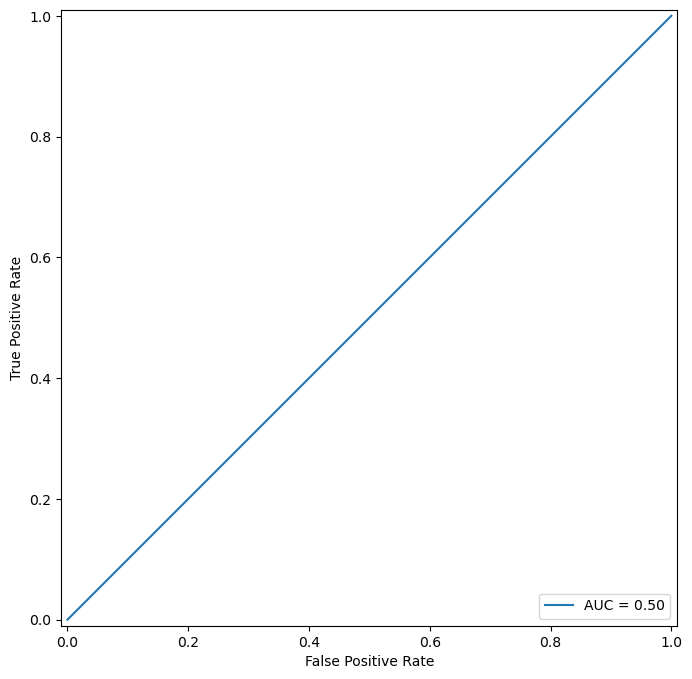

In [52]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc).plot()
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score
print('AUC score :',roc_auc_score(y_test,ypred_test))

AUC score : 0.5


## KNN

In [54]:
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,50)),'p':[1,2]}
knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train_pca,y_train)

knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=20, p=1)

In [55]:
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train_pca,y_train)

ypred_train = knn_model.predict(X_train_pca)
print('Train accuracy',accuracy_score(y_train,ypred_train))

ypred_test = knn_model.predict(X_test_pca)
print('Test accuracy',accuracy_score(y_test,ypred_test))

print('CV :',cross_val_score(knn_model,X_train_pca,y_train,cv=5,scoring='accuracy').mean())

Train accuracy 0.706855791962175
Test accuracy 0.6981132075471698
CV : 0.7069187675070028


## SVM

In [56]:
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

ypred_train = svm_grid.predict(X_train)
print('Train accuracy :',accuracy_score(y_train,ypred_train))

ypred_test = svm_grid.predict(X_test)
print('Test accuracy :',accuracy_score(y_test,ypred_test))

print('CV :',cross_val_score(svm_grid,X_train,y_train,cv=5,scoring='accuracy').mean())

Train accuracy : 0.8085106382978723
Test accuracy : 0.839622641509434
CV : 0.8084313725490195


## Decision Tree

In [57]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train_pca,y_train)

DecisionTreeClassifier(random_state=True)

In [59]:
X_train_pca

array([[-1.35062762e+00, -5.89751783e-01, -1.62103027e-01],
       [-1.31046778e+00,  1.49967357e-01,  3.80808217e-01],
       [-1.32240994e+00,  7.05772910e-03,  8.75151228e-01],
       ...,
       [ 2.16449629e+01,  2.06944639e-03, -1.46245961e+00],
       [ 1.36498613e+01, -1.57435855e+00, -1.59029266e-01],
       [-1.33823238e+00, -1.30346464e+00,  1.24220446e+00]])

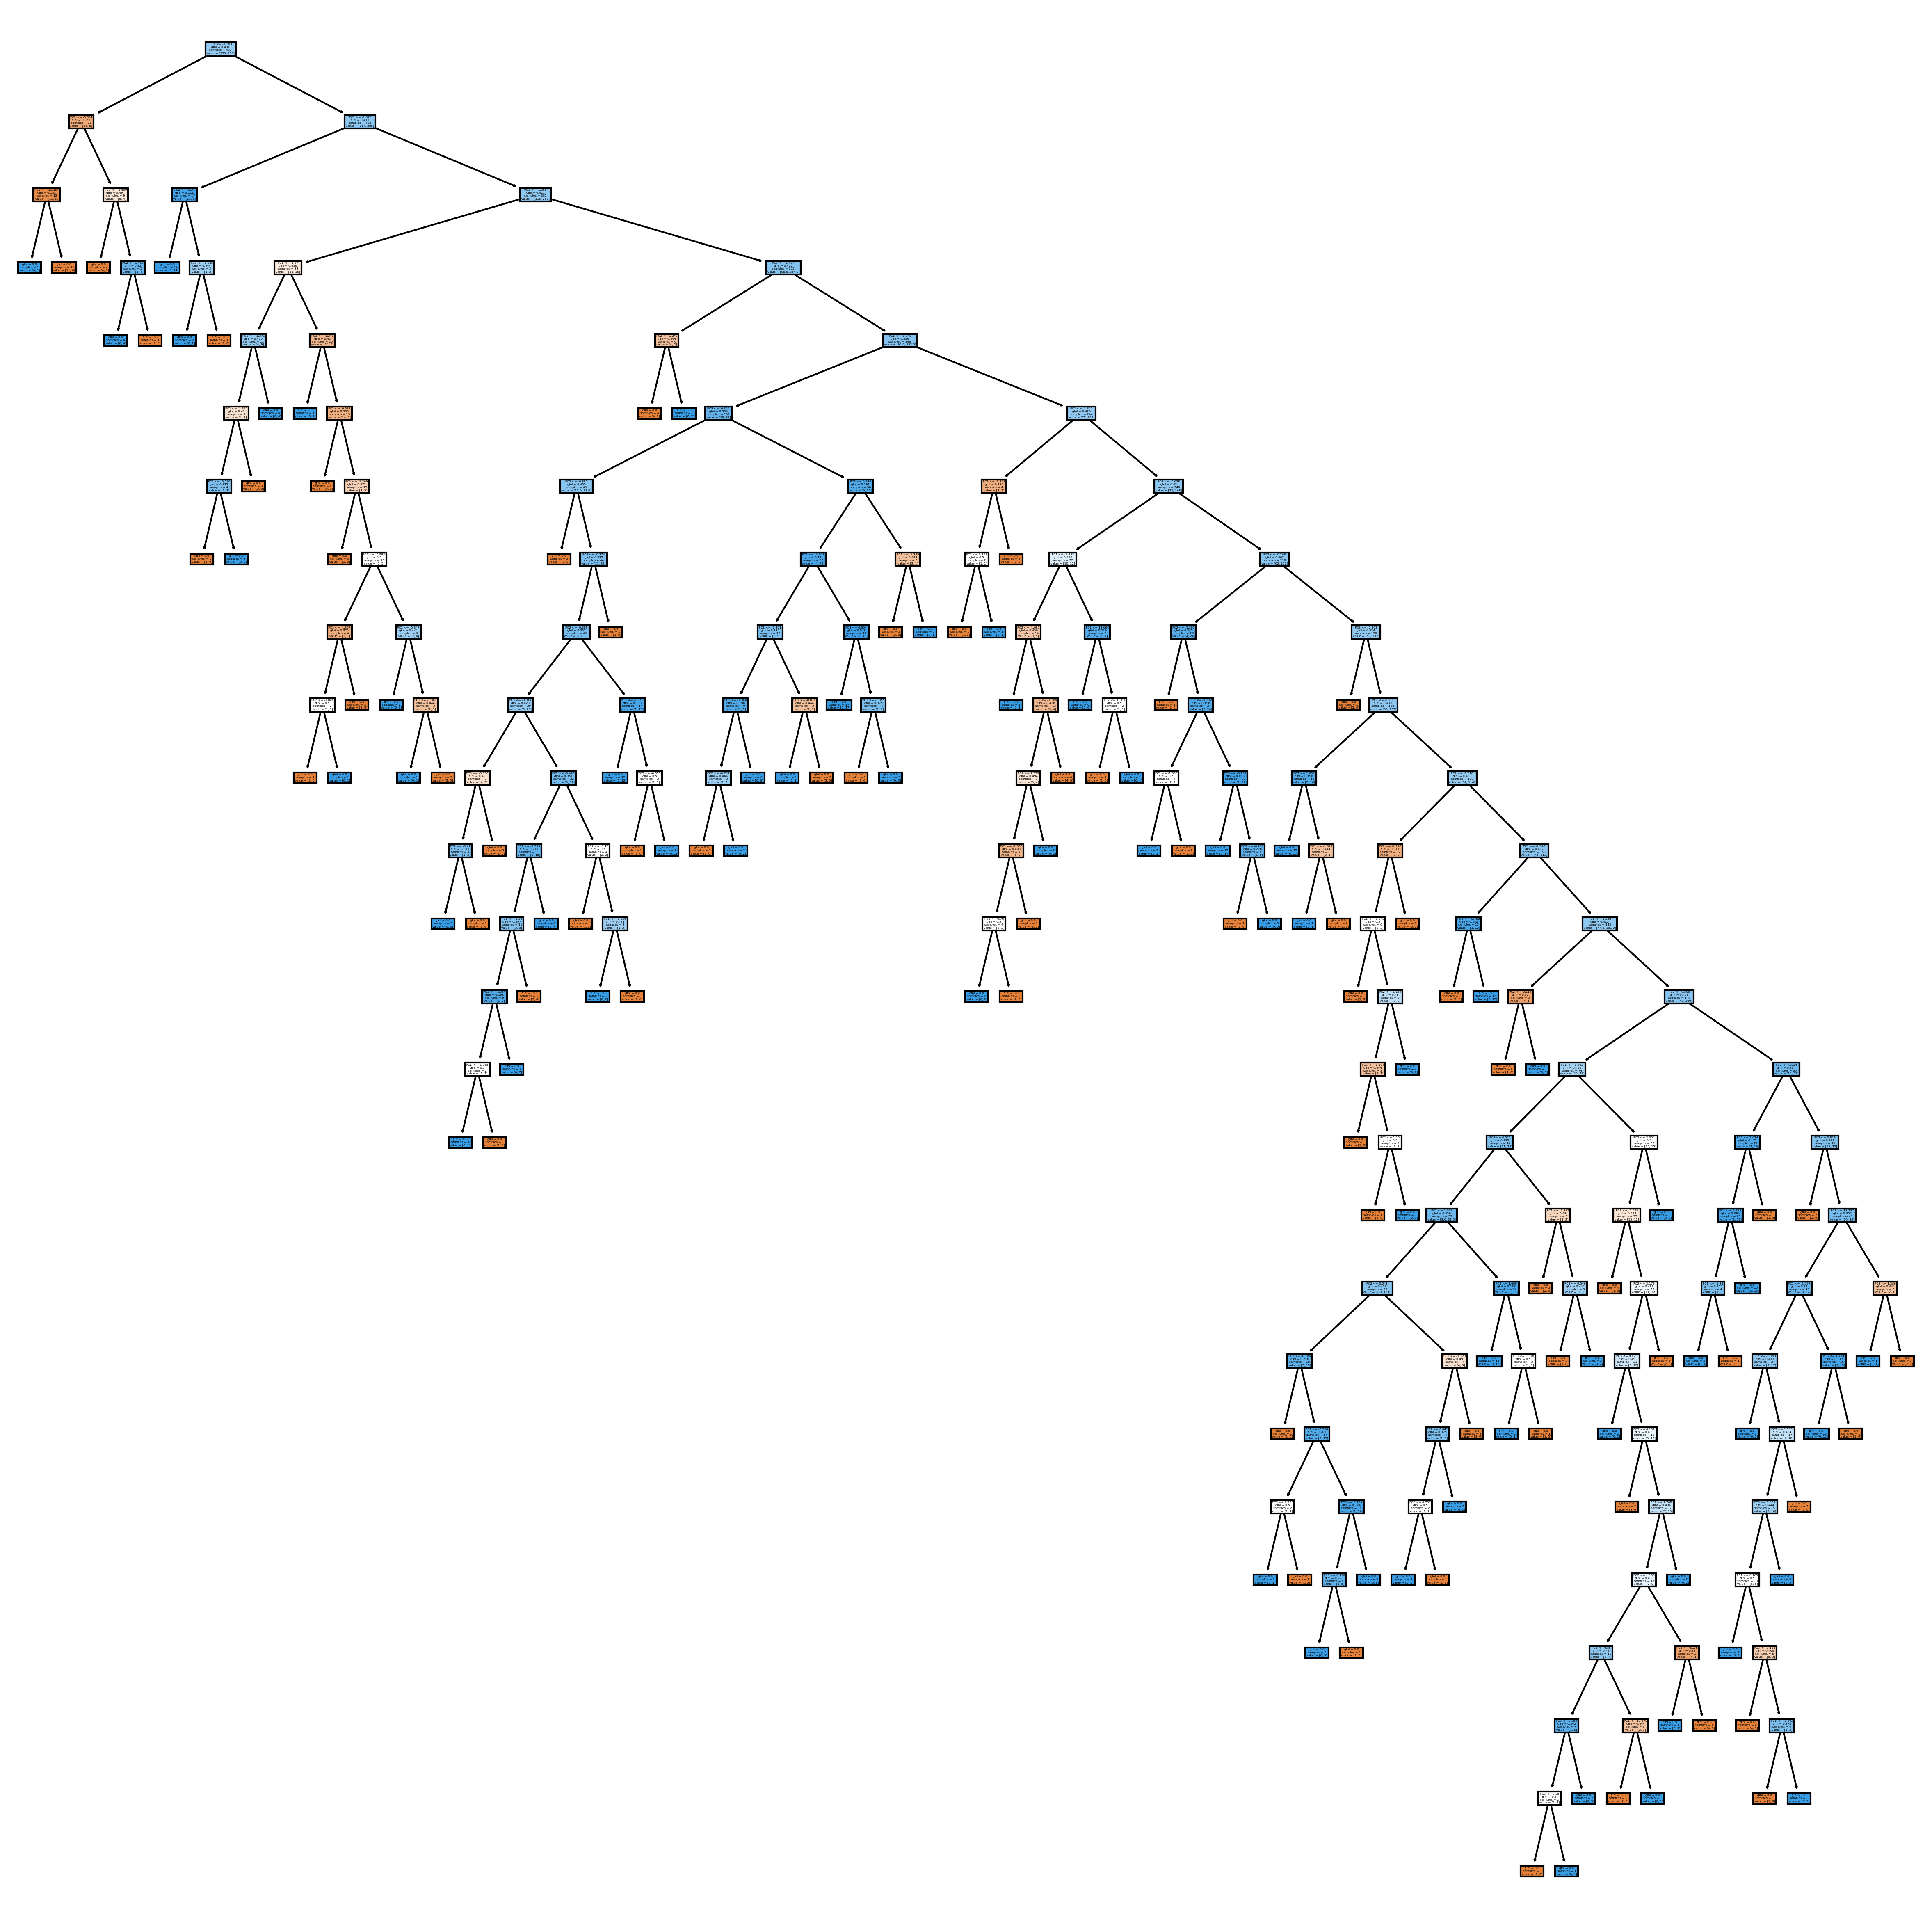

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create feature names for the principal components
feature_names = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

# Plot the decision tree
plt.figure(figsize=(20, 20), dpi=300)
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

In [63]:
estimator = DecisionTreeClassifier(random_state=True)
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,16))}

dt_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
dt_grid.fit(X_train_pca,y_train)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=4, random_state=True)

In [67]:
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                        index=X.iloc[:, :len(dt.feature_importances_)].columns,  # Ensure index matches
                        columns=['Importance'])

important_features_dt = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_dt

['Gender', 'Married', 'Dependents']

In [77]:
X_train_dt = X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print('Train accuracy :',accuracy_score(y_train,ypred_train))
print('Test accuracy :',accuracy_score(y_test,ypred_test))
print('CV :',cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())

Train accuracy : 0.6879432624113475
Test accuracy : 0.7075471698113207
CV : 0.6691036414565827


## Random Forest

In [96]:
estimator = RandomForestClassifier()
param_grid = {'n_estimators':list(range(1,51))}

rf_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train_pca,y_train)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=33)

In [97]:
# Assuming you have already performed PCA and have `X_train_pca`, `X_test_pca`

# Feature importances using Random Forest (rf) and selecting important features
feats_ab = pd.DataFrame(data=rf.feature_importances_, 
                        index=[f'PC{i+1}' for i in range(len(rf.feature_importances_))], 
                        columns=['Importance'])

# Select important features based on RF importance
important_features_rf = feats_ab[feats_ab['Importance'] > 0].index.to_list()

# If 'PC1' is an important feature, use PCA data, else use original data
if any(f.startswith('PC') for f in important_features_rf):  
    # Use PCA features in this case
    X_train_rf = X_train_pca[important_features_rf]
    X_test_rf = X_test_pca[important_features_rf]
else:
    # Use original features (X_train and X_test)
    X_train_rf = X_train[important_features_rf]
    X_test_rf = X_test[important_features_rf]

# Train Random Forest Model
rf = rf_grid.best_estimator_

# Fit the model with the selected features
rf.fit(X_train_rf, y_train)

# Predictions on training and testing data
ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

# Evaluate the model
print('Train accuracy:', accuracy_score(y_train, ypred_train))
print('Test accuracy:', accuracy_score(y_test, ypred_test))
print('Cross-validation score:', cross_val_score(rf, X_train_rf, y_train, cv=5, scoring='accuracy').mean())


Train accuracy: 0.9952718676122931
Test accuracy: 0.6320754716981132
Cross-validation score: 0.6406442577030812


## AdaBoostClassifier

In [101]:
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
ab_grid.fit(X_train_pca,y_train)

ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=1, random_state=True)

In [102]:
# Feature importances using the best AdaBoost model
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                        index=[f'PC{i+1}' for i in range(X_train_pca.shape[1])], 
                        columns=['Importance'])

# Select important features based on AdaBoost's feature importances
important_features_ab = feats_ab[feats_ab['Importance'] > 0].index.to_list()

# Prepare training and testing data using the important features
X_train_ab = X_train_pca[important_features_ab]
X_test_ab = X_test_pca[important_features_ab]

# Fit the best AdaBoost model
ab.fit(X_train_ab, y_train)

# Predictions on training and testing data
ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

# Evaluate the model
print('Train accuracy:', accuracy_score(y_train, ypred_train))
print('Test accuracy:', accuracy_score(y_test, ypred_test))
print('Cross-validation score:', cross_val_score(ab, X_train_ab, y_train, cv=5, scoring='accuracy').mean())


Train accuracy: 0.7115839243498818
Test accuracy: 0.7169811320754716
Cross-validation score: 0.7021288515406162


## Gradient Boost

In [103]:
# Initialize Gradient Boosting Classifier
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {
    'n_estimators': list(range(1, 10)),
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# Perform Grid Search with cross-validation to find the best model
gb_grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
gb_grid.fit(X_train_pca, y_train)

# Get the best Gradient Boosting model
gb = gb_grid.best_estimator_

# Feature importances using the best Gradient Boosting model
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                        index=[f'PC{i+1}' for i in range(X_train_pca.shape[1])], 
                        columns=['Importance'])

# Select important features based on Gradient Boosting's feature importances
important_features_gb = feats_gb[feats_gb['Importance'] > 0].index.to_list()

# Prepare training and testing data using the important features
X_train_gb = X_train_pca[important_features_gb]
X_test_gb = X_test_pca[important_features_gb]

# Fit the best Gradient Boosting model
gb.fit(X_train_gb, y_train)

# Predictions on training and testing data
ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

# Evaluate the model
print('Train accuracy:', accuracy_score(y_train, ypred_train))
print('Test accuracy:', accuracy_score(y_test, ypred_test))
print('Cross-validation score:', cross_val_score(gb, X_train_gb, y_train, cv=5, scoring='accuracy').mean())


Train accuracy: 0.7210401891252955
Test accuracy: 0.7264150943396226
Cross-validation score: 0.7068347338935574


## Xgboost

In [109]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 1: Grid Search for Hyperparameters using XGBClassifier on PCA-transformed data
estimator = XGBClassifier()
param_grid = {'n_estimators': [10, 20, 40, 100],
              'max_depth': [3, 4, 5],
              'gamma': [0, 0.15, 0.3, 0.5, 1]}
xgb_grid = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train_pca, y_train)

# Step 2: Extract Feature Importances from the Best Model
xgb_best = xgb_grid.best_estimator_
feats_xgb = pd.DataFrame(data=xgb_best.feature_importances_,
                         index=[f'PC{i+1}' for i in range(X_train_pca.shape[1])],
                         columns=['Importance'])

# Step 3: Identify Important Features (Principal Components)
important_features_xgb = feats_xgb[feats_xgb['Importance'] > 0].index.to_list()

# Step 4: Select the Important Principal Components
X_train_xgb = X_train_pca[important_features_xgb]
X_test_xgb = X_test_pca[important_features_xgb]

# Step 5: Re-train the XGBoost Model on the Selected Features
xgb_best.fit(X_train_xgb, y_train)

# Step 6: Make Predictions and Evaluate the Model
ypred_train = xgb_best.predict(X_train_xgb)
ypred_test = xgb_best.predict(X_test_xgb)

print('Train accuracy:', accuracy_score(y_train, ypred_train))
print('Test accuracy:', accuracy_score(y_test, ypred_test))
print('Cross-validation accuracy:', cross_val_score(xgb_best, X_train_xgb, y_train, cv=5, scoring='accuracy').mean())


Train accuracy: 0.7423167848699763
Test accuracy: 0.6792452830188679
Cross-validation accuracy: 0.6949859943977591


# ANN

In [117]:
from keras.models import Sequential
ann = Sequential()

In [119]:
from keras.layers import Dense
ann.add(Dense(input_dim =3 ,units =6 ,kernel_initializer = 'uniform', activation = 'relu'))

In [120]:
ann.add(Dense(units = 6 ,kernel_initializer = 'uniform', activation = 'relu'))

In [121]:
ann.add(Dense(units = 1 ,kernel_initializer = 'uniform', activation = 'sigmoid'))

In [122]:
ann.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [123]:
ann.fit(X_train_pca,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5734 - loss: 0.6926
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - loss: 0.6898 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.6868 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6806 - loss: 0.6850 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 0.6810 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7139 - loss: 0.6757 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6858 - loss: 0.6734 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6959 - loss: 0.6670 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6972 - loss: 0.6629 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.6601 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.6548 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [128]:
y_pred = ann.predict(X_test_pca)
y_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [129]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Test accuracy:',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Test accuracy: 0.7264150943396226


array([[ 2, 28],
       [ 1, 75]], dtype=int64)

In [130]:
def build_cross_classifier():
    classifier = Sequential()
    Classifier.add(Dense(input_dim =3 ,units =6 ,kernel_initializer = 'uniform', activation = 'relu'))
    Classifier.add(Dense(units = 6 ,kernel_initializer = 'uniform', activation = 'relu'))
    Classifier.add(Dense(units = 1 ,kernel_initializer = 'uniform', activation = 'sigmoid'))
    ann.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])
    return Classifier

In [137]:
from scikeras.wrappers import KerasClassifier
classifier = KerasClassifier(build_cross_classifier,batch_size=32,epochs=100)

In [140]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import make_classification

# Step 1: Generate sample data (replace with your actual dataset)
# For demonstration purposes, let's generate a dataset with 10 features
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Step 2: Define the model-building function
def build_classifier():
    model = Sequential()
    # Adjust the input_dim to match the number of features (in this case, 10)
    model.add(Dense(64, input_dim=10, activation='relu'))  # input_dim is set to 10
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Wrap the model with KerasClassifier for cross-validation
classifier = KerasClassifier(model=build_classifier, batch_size=32, epochs=10)

# Step 4: Perform K-fold cross-validation
accuracies = cross_val_score(classifier, X, y, cv=5)

# Step 5: Print the cross-validation results
print("Cross-validation accuracies:", accuracies)
print("Mean accuracy:", np.mean(accuracies))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5619 - loss: 0.6712
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8424 - loss: 0.5096 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8456 - loss: 0.4065 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.3703 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: 0.3188 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.3438 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3176 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.2865 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3191 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3226 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5098 - loss: 0.7333   
Epoch 2/10
25/25 ━━━━━━━━

# Save and predict on model

In [111]:
from joblib import dump
dump(dt,'loan.joblib_new')

['loan.joblib_new']

In [112]:
input_data ={"Loan_ID":"LP002991",
            "Gender":"Male",
            "Married":"No",
            "Dependents":1,
            "Education":"Graduate",
            "Self_Employed":"yes",
            "ApplicantIncome":1000,
            "CoapplicantIncome":0,

            "LoanAmount":100,
            "Loan_Amount_Term": 240,
            "Credit_History":"bad",
            "Property_Area":"Urban"}

In [113]:
df = pd.DataFrame(input_data,index=[0])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,bad,Urban


In [114]:
df.drop(columns=["Loan_ID"],inplace=True)
df["Income"] = df['ApplicantIncome' ] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome' ], inplace=True)

df['Dependents' ] = df['Dependents' ].fillna(0)
df['Gender' ] = df['Gender'].fillna(df['Gender'].mode() [0])
df['Married' ] = df['Married' ].fillna(df['Married'].mode() [0])
df['Self_Employed' ] = df['Self_Employed' ].fillna(df['Self_Employed' ].mode() [0])
df = df.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term' ,'Credit_History' ])
df['Dependents' ] = df['Dependents']. astype('int')
df['Loan_Amount_Term' ] = df['Loan_Amount_Term' ]. astype('int')

df['Gender' ] = df['Gender' ].replace({'Male':1,'Female':0})
df['Married' ] = df['Married'].replace({'Yes':1,'No':0})
df['Education' ] = df['Education' ].replace({'Graduate':1,'Not Graduate' :0})
df['Self_Employed'] = df['Self_Employed' ].replace({'yes':1,'No':0})
df['Property_Area' ] = df['Property_Area' ].replace({'Rural':0,'Semiurban':1,'Urban' :2})
df['Credit_History' ] = df['Credit_History' ].replace({'good':1,'bad':0})
df['Loan_Amount_Term' ] = df['Loan_Amount_Term' ]/12

X_new = df

In [115]:
X_new = X_new[important_features_dt]

dt.predict(X_new)

array([1], dtype=int64)